In [819]:
import numpy as np
import pandas as pd
from plotnine import *
import random

In [820]:
cdata = []
i = 0
p = 0.1
with open("tempdata/var/log/remote/wireless-encoded/wireless_10-06-2020.log") as f:
    for line in f:
        l = f.readline()
        
        if random.random() < p:
            cdata.append(l)

In [821]:
len(cdata)

296492

In [823]:
authdata = []
with open("tempdata/var/log/remote/wireless-encoded/wireless_10-06-2020.log") as f:
    for line in f:
        l = f.readline()
        if l.find("Authentication Successful") > -1:
            authdata.append(l.split(" "))

In [824]:
authdf = pd.DataFrame(authdata)
authdf = authdf.iloc[: ,[15,16]]

authdf.columns = ["username" , "mac"]
#authdf = authdf[authdf["mac"] != '']
authdf = authdf[authdf["mac"].str.find("=") > -1]
authdf["mac"] = authdf["mac"].apply(lambda r : r.split("=")[1])
authdf = authdf.drop_duplicates()
authdf

,username,mac
0,username=w4bDmMOGworCjsKOwqjDqcOiw5PDlmjClMKTw...,66:ce:7e:ed:aa:ee
1,username=w4PDlcOGwpLCmFLCqMOpw6LDk8OWaMKUwpPDmMKD,34:42:62:77:1a:9b
3,username=wrfDh8OXwo_CjsKEw6HCpcK0w6XDocKdwpJdw...,96:7f:71:8c:75:4a
5,username=wrfDk8OUwpLCn8KJw5vCrcK0w6XDocKdwpJdw...,40:9c:28:17:07:60
6,username=wrTDkcOIwozCjsKSw5PCp8K0w6XDocKdwpJdw...,08:c5:e1:fc:71:24
...,...,...
136677,username=wr3DnsOUwo_Cm1jCqMOpw6LDk8OWaMKUwpPDmMKD,9a:7a:5e:98:76:ea
136802,username=wrbDh8OIwoHCn8KUw43DpsK0w6XDocKdXcKUw...,0a:93:d1:98:72:bc
136955,username=w4HDkcOKwoXCkcKPw5XCtMOpw57DlsKdXcKUw...,14:f6:d8:72:16:40
137458,username=w4PDlcOYTcKWwpDDicOYw6fCsMOowqjCksKSw...,60:d9:c7:ac:9b:98


C:\Users\Abhijeet\Documents\GitHub\Datathon\dt\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 48'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


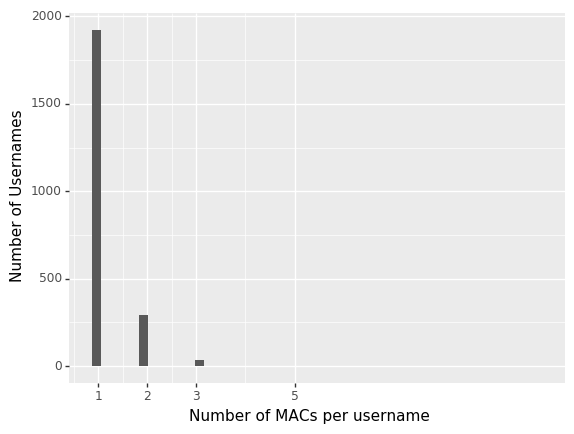

<ggplot: (-9223371893476095961)>

In [825]:
(
    ggplot(authdf.groupby("username")["mac"].nunique().reset_index())
    + geom_histogram(aes(x="mac"))
    + xlab("Number of MACs per username")
    + ylab("Number of Usernames")
    + scale_x_continuous(breaks=(0,1,2,3,5))
)

In [826]:
authdf["username"].nunique()

2259

In [828]:
data = []

i = 0
with open("tempdata/var/log/remote/wireless-encoded/wireless_10-06-2020.log") as f:
    for line in f:
        l = f.readline()
        if l.find("Assoc success") > -1 and l.find("|AP") > -1:
            data.append(l.split(" "))

In [ ]:
df = pd.DataFrame(data)
cols = [0,2,3 , 10,17]

In [ ]:
access_to_build = pd.read_excel("access_points_bldgs_merged.xlsx")
access_to_build["Device"] = access_to_build["Device"].str.lower()
access_to_build

In [ ]:
fdf = df.iloc[: , cols]
fdf = fdf.rename({0:"month" , 2: "day" , 3 : "time" , 10:"ap" , 17:"mac"} , axis=1)
fdf["ap"] = fdf["ap"].apply(lambda r : r.split("@")[0].lower())
fdf["building"] = fdf["ap"].apply(lambda r : r[0:4].lower() if r.find("EXT") < 0 else  r[4:8].lower() )
fdf['time'] = fdf["month"] + "-" + fdf["day"] + "-" +fdf["time"]
fdf["time"] = pd.to_datetime(fdf["time"] , format="%b-%d-%H:%M:%S")
fdf["time"] = fdf["time"].apply(lambda t : t.replace(year=2020 , month=fdf.loc[0,"month"] , day=fdf.loc[0,"day"]))
fdf["mac"] = fdf["mac"].apply(lambda r : r.strip(": "))
#fdf[fdf["user"] == "d0:d2:b0:92:df:70:"].groupby(pd.Grouper(key="time" , freq="15min")).size()


In [ ]:
fdf = fdf = pd.merge(fdf, access_to_build , left_on="ap" , right_on="Device" , how="left")[["month" , "day","time" , "ap" , "mac" ,"Matched_Building"]]
fdf = fdf.rename({"Matched_Building" : "building"} , axis=1)

In [ ]:
fdf

In [ ]:
fdf.groupby([pd.Grouper(key="time" , freq="10ms") , pd.Grouper(key="mac")]).size()`

C:\Users\Abhijeet\Documents\GitHub\Datathon\dt\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 103'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)
C:\Users\Abhijeet\Documents\GitHub\Datathon\dt\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_bin : Removed 645 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\Abhijeet\Documents\GitHub\Datathon\dt\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


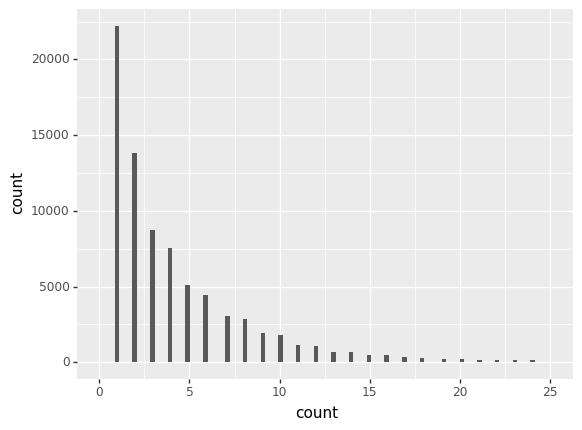

<ggplot: (143572009890)>

In [500]:
(

    ggplot(fdf.groupby([pd.Grouper(key="time" , freq="10min") , pd.Grouper(key="mac")]).size().reset_index().rename({0:"count"} , axis=1))
    + geom_histogram(aes(x="count"))
    + scale_x_continuous(limits=(0,25))
)


In [338]:
macbuildcounts = fdf.groupby("mac")["building"].nunique()
macbuildcounts = macbuildcounts[macbuildcounts > 1]
macbuildcounts = macbuildcounts.index.values

In [340]:
fdf = fdf[fdf["mac"].isin(macbuildcounts)]

In [829]:
fdf["mac"].nunique()

10680

In [314]:
ldf = pd.merge(fdf , authdf ,on="mac", how="left").sort_values("time")
ldf

,time,ap,mac,building,username
0,1900-01-01 00:00:00,Colv5COR2-AP325-1,74:40:bb:55:76:44,colv,NaN
1,1900-01-01 00:00:00,EXT-EPIC1380-AP275-1,ec:aa:25:6d:50:30,epic,NaN
2,1900-01-01 00:00:01,Came206-AP325-1,50:3e:aa:68:07:56,came,NaN
3,1900-01-01 00:00:01,EXT-BelH201-AP275-1,e2:20:b3:a4:9b:b0,belh,NaN
4,1900-01-01 00:00:01,EXT-StuA-Ticket-AP275-South,00:23:68:cd:dc:af,stua,NaN
...,...,...,...,...,...
336030,1900-01-01 23:59:29,Faci208-AP325-1,d0:d2:b0:92:df:70,faci,NaN
336031,1900-01-01 23:59:30,EXT-Gage105-AP375-1,f8:ff:c2:ca:7e:ed,gage,username=wrTDjcOGwonCn1LCqMOpw6LDk8OWaMKUwpPDmMKD
336032,1900-01-01 23:59:32,EXT-StuU150B-AP275-1,fa:f8:b2:49:76:65,stuu,NaN
336033,1900-01-01 23:59:38,EXT-StuA-Ticket-AP275-South,00:23:68:cd:e2:41,stua,NaN


In [438]:
FREQ = 3

In [833]:
fdf.groupby([pd.Grouper(key="time" , freq=f"30s") , pd.Grouper(key="building")])["mac"].nunique()

time                 building                            
2020-10-06 00:00:00  Barnhardt Student Activity Center       1
                     Belk Hall                               3
                     Cameron Hall                            2
                     Colvard                                 1
                     Denny                                   1
                                                            ..
2020-10-06 23:59:00  Scott Hall                              1
2020-10-06 23:59:30  Barnhardt Student Activity Center       1
                     Gage Undergraduate Admissions Center    1
                     Popp Martin Student Union               1
                     Scott Hall                              1
Name: mac, Length: 96889, dtype: int64

In [554]:
def freq_tune(r=np.arange(1,30 , 1) , unit="min"):
    data = []
    for i in r:
        res = fdf.groupby([pd.Grouper(key="time" , freq=f"{i}{unit}") , pd.Grouper(key="building")])["mac"].nunique()
        res = res.reset_index()
        #res = res.groupby([pd.Grouper(key="time" , freq=f"15min") , pd.Grouper(key="building")])["mac"].sum().reset_index()
        res["time"] = res["time"].apply(lambda t : (t.hour*60 + t.minute)/60)
        d = res.groupby([pd.Grouper(key="time")])["mac"].sum().max()
        data.append((i,d))
    return data

In [560]:
tunedf2 = pd.DataFrame(freq_tune(np.arange(1,300,1) , unit="s") , columns=["t" , "maxcount"])

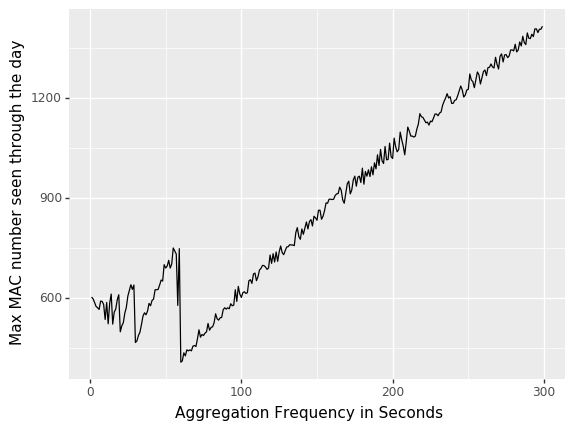

<ggplot: (-9223371893585993710)>

In [561]:
(
    ggplot(tunedf2)
    + geom_line(aes(x="t", y="maxcount") ,group=1 )
    + xlab("Aggregation Frequency in Seconds")
    + ylab("Max MAC number seen through the day")
)

In [549]:
res.groupby([pd.Grouper(key="time")])["mac"].sum().max()

704

In [604]:
buildingagg = fdf.groupby(pd.Grouper(key="building"))["mac"].nunique().reset_index()
buildingagg["building"] = buildingagg["building"].cat.reorder_categories(buildingagg.sort_values("mac",ascending=False)["building"].values.astype(str))

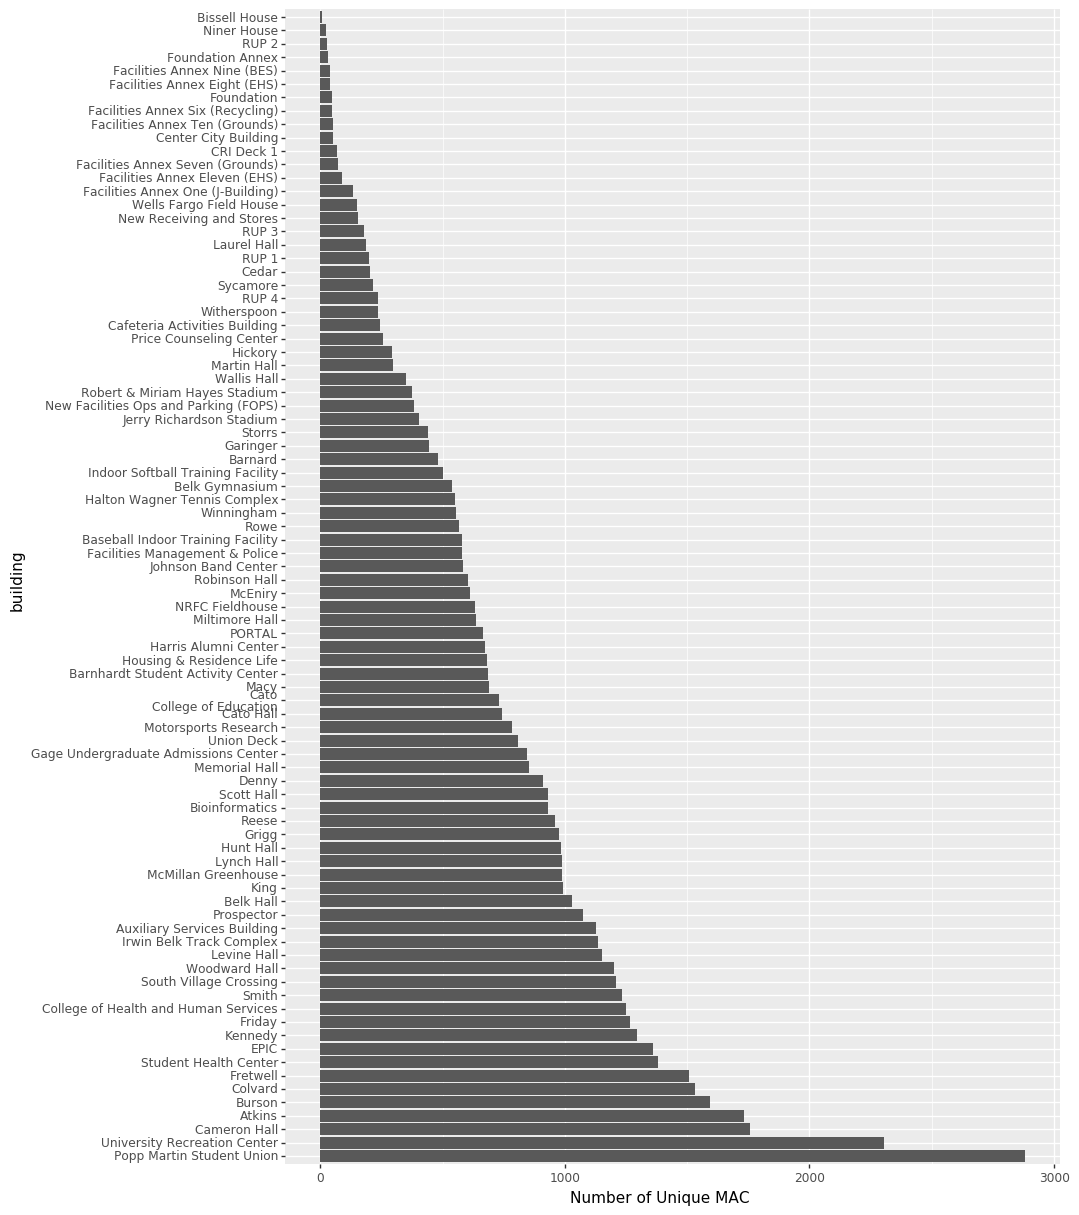

<ggplot: (143557362019)>

In [632]:
#fdf["building"] = pd.Categorical(fdf["building"] , categories=fdf.groupby(pd.Grouper(key="building"))["mac"].nunique().sort_values(ascending=False).index.values)
(
    ggplot(buildingagg)
    + geom_col(aes(x="building" , y="mac"))
    + coord_flip()
    + theme(figure_size=(10,15))
    + ylab("Number of Unique MAC")
)


In [662]:
res = limitedfdf.groupby([pd.Grouper(key="time" , freq=f"30s") , pd.Grouper(key="building")])["mac"].nunique()
res = res.reset_index()
#res = res.groupby([pd.Grouper(key="time" , freq=f"15min") , pd.Grouper(key="building")])["mac"].sum().reset_index()
res["time"] = res["time"].apply(lambda t : (t.hour*60 + t.minute)/60)
res

,time,building,mac
0,0.000000,Colvard,1
1,0.000000,EPIC,1
2,0.000000,Cameron Hall,2
3,0.000000,Belk Hall,3
4,0.000000,Barnhardt Student Activity Center,1
...,...,...,...
92365,23.983333,CRI Deck 1,1
92366,23.983333,Barnhardt Student Activity Center,1
92367,23.983333,Scott Hall,1
92368,23.983333,Popp Martin Student Union,1


In [663]:
# rollwin = res.groupby("building").apply(lambda df : df["mac"].rolling(12*60).mean()).reset_index().set_index("level_1").join(res ,rsuffix="_r")
# rollwin

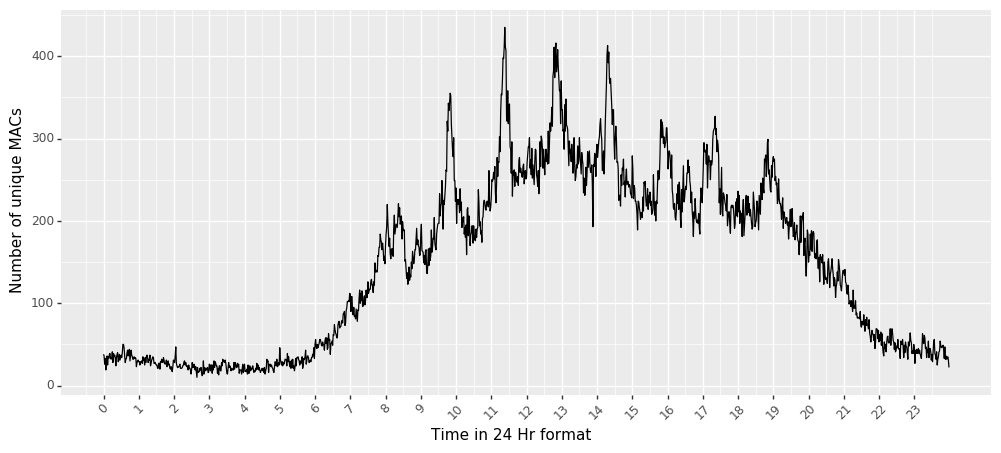

<ggplot: (143576686056)>

In [664]:
(
ggplot( res.groupby([pd.Grouper(key="time")])["mac"].sum().reset_index(), aes(x="time" , y="mac"))
+ geom_line(group=1)
    #+ geom_smooth(color="blue")
+ scale_x_continuous(breaks=np.arange(0,24 , 1))
    + theme(figure_size=(12,5)  , axis_text_x=element_text(rotation=45))
    + xlab("Time in 24 Hr format")
    + ylab("Number of unique MACs")
)

In [666]:
res = res.reset_index()

In [667]:
res["building"] = res["building"].astype("category").cat.reorder_categories(res.groupby("building")["mac"].sum().sort_values(ascending=False).index.values.astype(str))

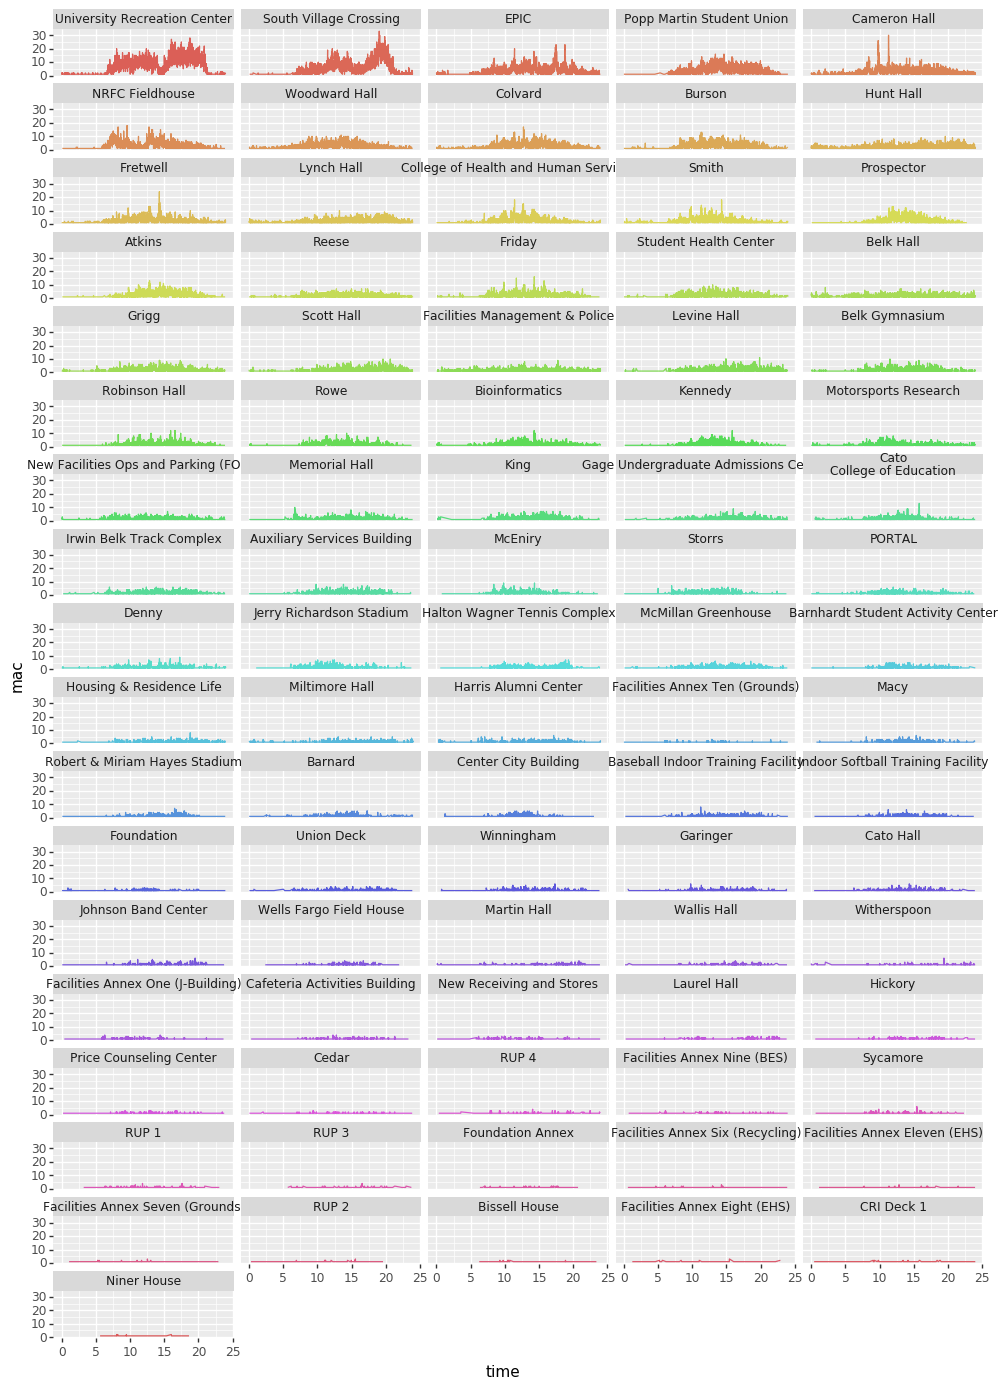

<ggplot: (143553029640)>

In [668]:
#[res["building"].isin(["atki" , "came" , "coed" , "fret"])]
(
ggplot(res , aes(x="time" , y="mac" , group="building" , color="building"))
+ geom_line()
+ facet_wrap("~ building" , ncol=5)
+ theme(figure_size=(12,17))
+ scale_color_discrete(guide=False)
)

In [357]:
gdf = fdf.groupby([pd.Grouper(key="time" , freq="15min") , pd.Grouper(key="mac")]).size().reset_index()
gdf["time"] = gdf["time"].apply(lambda t : (t.hour*60 + t.minute)/60)
gdf = gdf.rename({0:'count'} , axis=1) 
gdf["count"] = gdf["count"] > 0

In [358]:
gdf

,time,mac,count
0,0.00,00:13:e0:fd:01:99,True
1,0.00,02:4d:cb:d5:92:f9,True
2,0.00,02:88:a4:ec:45:7c,True
3,0.00,02:a8:cd:23:1a:23,True
4,0.00,04:72:95:10:63:0e,True
...,...,...,...
57161,23.75,f8:87:f1:51:7f:af,True
57162,23.75,f8:95:ea:f0:70:e4,True
57163,23.75,f8:ff:c2:ca:7e:ed,True
57164,23.75,fa:f8:b2:49:76:65,True


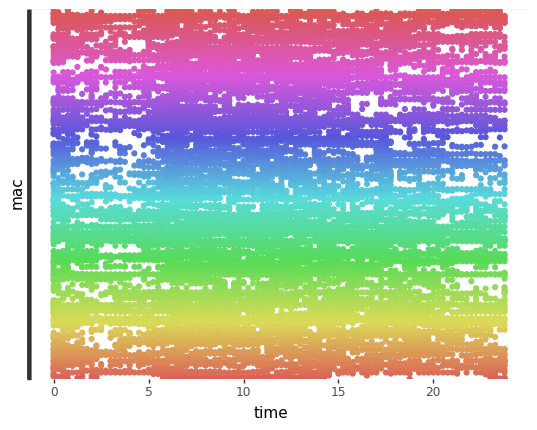

<ggplot: (-9223371893448630773)>

In [210]:
(
    ggplot(gdf[gdf["mac"].isin(gdf["mac"].unique()[:1000])] , aes(x="time" , y="mac" , color="mac"))
     + geom_point()
    + scale_color_discrete(guide=False)
    + theme(axis_text_y = element_blank())
)

In [97]:
gdf = gdf.groupby("user")["time"].nunique().reset_index()
gdf

,user,time
0,00:0a:f5:e0:36:cf:,9
1,00:12:cc:00:19:e6:,5
2,00:12:cc:00:22:69:,21
3,00:12:cc:00:23:50:,30
4,00:12:cc:00:24:07:,4
...,...,...
10675,fe:ef:af:eb:63:c6:,11
10676,fe:f0:ee:d3:b5:f6:,1
10677,fe:f1:d9:52:2e:93:,9
10678,fe:f4:f8:45:90:e4:,8


In [98]:
gdf["time"] = (gdf["time"]*15)/60
gdf

,user,time
0,00:0a:f5:e0:36:cf:,2.25
1,00:12:cc:00:19:e6:,1.25
2,00:12:cc:00:22:69:,5.25
3,00:12:cc:00:23:50:,7.50
4,00:12:cc:00:24:07:,1.00
...,...,...
10675,fe:ef:af:eb:63:c6:,2.75
10676,fe:f0:ee:d3:b5:f6:,0.25
10677,fe:f1:d9:52:2e:93:,2.25
10678,fe:f4:f8:45:90:e4:,2.00


C:\Users\Abhijeet\Documents\GitHub\Datathon\dt\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 70'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)
C:\Users\Abhijeet\Documents\GitHub\Datathon\dt\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_bin : Removed 32 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\Abhijeet\Documents\GitHub\Datathon\dt\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


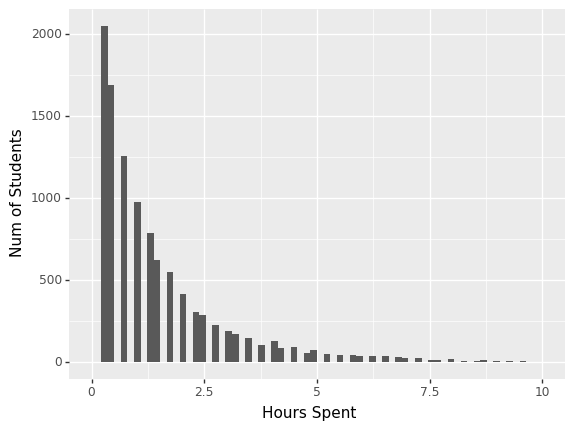

<ggplot: (143244251705)>

In [102]:

( ggplot(
    gdf
    ,aes(x="time")
    )
 + geom_histogram()
 + scale_x_continuous(limits=(0,10))
 + xlab("Hours Spent")
 + ylab("Num of Students")
)

In [82]:
fdf.groupby("user")["building"].nunique()

user
00:0a:f5:e0:36:cf:     3
00:12:cc:00:19:e6:     1
00:12:cc:00:22:69:    27
00:12:cc:00:23:50:    29
00:12:cc:00:24:07:     1
                      ..
fe:ef:af:eb:63:c6:     4
fe:f0:ee:d3:b5:f6:     1
fe:f1:d9:52:2e:93:     9
fe:f4:f8:45:90:e4:     3
fe:f6:79:52:9c:b9:    13
Name: building, Length: 10680, dtype: int64

C:\Users\Abhijeet\Documents\GitHub\Datathon\dt\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 67'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


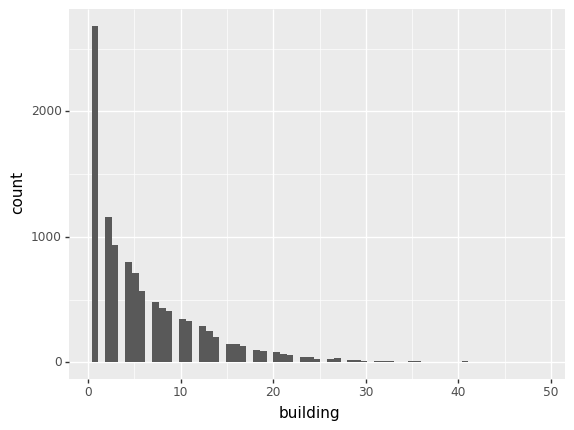

<ggplot: (143229374542)>

In [88]:
(
    ggplot(fdf.groupby("user")["building"].nunique().reset_index()
           , aes(x="building"))
    + geom_histogram()
)

In [641]:
fdf["hour"] = fdf["time"].apply(lambda t : (t.hour*60 + t.minute)/60)

In [656]:
list(fdf["mac"].unique())

['74:40:bb:55:76:44',
 'ec:aa:25:6d:50:30',
 '50:3e:aa:68:07:56',
 'e2:20:b3:a4:9b:b0',
 '00:23:68:cd:dc:af',
 '24:f6:77:09:2c:94',
 '0e:02:44:66:8a:46',
 '0c:ee:99:6c:aa:17',
 'c0:9a:d0:4b:0f:3b',
 '82:fd:01:3a:7e:a4',
 'f6:ae:66:12:cb:55',
 '2e:30:a2:82:b2:95',
 '66:ce:7e:ed:aa:ee',
 '80:4e:70:16:1d:b6',
 'f0:18:98:13:81:a2',
 '8a:b9:35:c7:3e:9a',
 '88:a4:79:60:a7:52',
 '5c:cf:7f:bd:9c:d5',
 '3e:bf:e9:94:bc:9d',
 'f8:4e:73:cd:06:12',
 '40:9f:38:b8:b3:23',
 '5e:60:25:e5:1d:6b',
 'd0:04:01:3a:d6:aa',
 '00:23:68:e9:35:c3',
 '4a:66:ef:58:9e:ad',
 '34:41:5d:ab:a9:1e',
 'b8:76:3f:91:ba:3e',
 '14:87:6a:ce:c6:35',
 'f0:98:9d:c5:06:16',
 '78:36:90:55:e9:e7',
 'e6:2f:fb:32:61:9d',
 '54:33:cb:49:96:b8',
 '30:d9:d9:eb:bc:58',
 'da:f4:18:3a:5c:f0',
 '96:7f:71:8c:75:4a',
 '36:1f:4c:17:d7:58',
 '24:f6:77:01:65:d4',
 'a4:83:e7:1a:d4:1c',
 'a4:83:e7:4a:1f:b6',
 '3e:73:13:55:0b:8a',
 '7c:b2:7d:e1:4a:a6',
 '64:51:06:66:77:c4',
 'fe:63:fc:c6:55:ff',
 '8a:5b:57:8a:41:8c',
 'a0:56:f3:b4:76:43',
 '7c:01:91

In [832]:
#"e2:20:b3:a4:9b:b0"
#indivmac = "fa:f8:b2:49:76:65"
#indivmac = "3a:3a:11:88:cb:75"
indivmac = "9a:96:f8:b7:9e:d3"
(
    ggplot(fdf[fdf["mac"] == indivmac])
    + geom_line(aes(x="hour" , y="building") , group=1 , alpha=0.2)
    + geom_point(aes(x="hour" , y="building") )
    + theme(figure_size=(12,5),axis_text_x=element_text(rotation=45))
    + xlab("Time of Day")
    + scale_x_continuous(breaks=np.arange(0,25,1))
)

PlotnineError: "Could not evaluate the 'x' mapping: 'hour' (original error: name 'hour' is not defined)"

In [232]:
btdf = fdf.copy()
btdf["time"] = btdf["time"].apply(lambda time : np.floor((time.hour*60+ time.minute)/15))
btdf
#.groupby([pd.Grouper(key="time" , freq="15min") , pd.Grouper(key="mac")])["building"].nunique().reset_index()

,time,ap,mac,building
0,0.0,Colv5COR2-AP325-1,74:40:bb:55:76:44,colv
1,0.0,EXT-EPIC1380-AP275-1,ec:aa:25:6d:50:30,epic
2,0.0,Came206-AP325-1,50:3e:aa:68:07:56,came
3,0.0,EXT-BelH201-AP275-1,e2:20:b3:a4:9b:b0,belh
4,0.0,EXT-StuA-Ticket-AP275-South,00:23:68:cd:dc:af,stua
...,...,...,...,...
336030,95.0,Faci208-AP325-1,d0:d2:b0:92:df:70,faci
336031,95.0,EXT-Gage105-AP375-1,f8:ff:c2:ca:7e:ed,gage
336032,95.0,EXT-StuU150B-AP275-1,fa:f8:b2:49:76:65,stuu
336033,95.0,EXT-StuA-Ticket-AP275-South,00:23:68:cd:e2:41,stua


In [235]:
btdf = btdf.groupby(["mac" , "building"]).apply(lambda df : df["time"].nunique()).reset_index()
btdf = btdf.rename({0 : "count"} , axis=1)

In [237]:
btdf

,mac,building,count
0,00:0a:f5:e0:36:cf,gage,1
1,00:0a:f5:e0:36:cf,levi,8
2,00:0a:f5:e0:36:cf,svdh,1
3,00:12:cc:00:19:e6,faci,5
4,00:12:cc:00:22:69,batf,2
...,...,...,...
67688,fe:f6:79:52:9c:b9,mcmi,1
67689,fe:f6:79:52:9c:b9,robi,1
67690,fe:f6:79:52:9c:b9,stuu,1
67691,fe:f6:79:52:9c:b9,urec,1


C:\Users\Abhijeet\Documents\GitHub\Datathon\dt\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 174'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


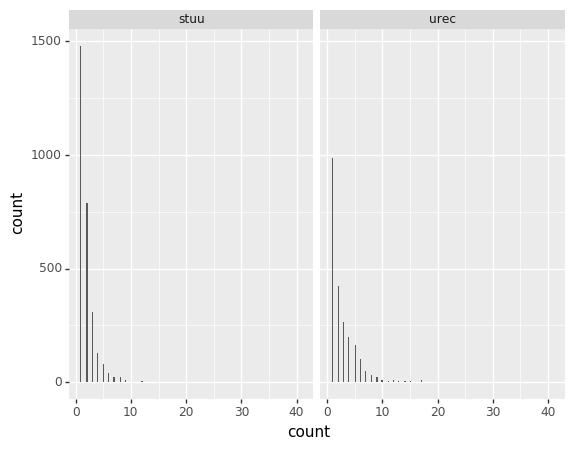

<ggplot: (-9223371893622522715)>

In [242]:
(

    ggplot(btdf[btdf["building"].isin(["stuu" , "urec"])] , aes(x="count"))
    + facet_wrap("~ building")
     + geom_histogram()
)

In [659]:
fdf

,time,ap,mac,building,hour
0,1900-01-01 00:00:00,colv5cor2-ap325-1,74:40:bb:55:76:44,Colvard,0.000000
1,1900-01-01 00:00:00,ext-epic1380-ap275-1,ec:aa:25:6d:50:30,EPIC,0.000000
2,1900-01-01 00:00:01,came206-ap325-1,50:3e:aa:68:07:56,Cameron Hall,0.000000
3,1900-01-01 00:00:01,ext-belh201-ap275-1,e2:20:b3:a4:9b:b0,Belk Hall,0.000000
4,1900-01-01 00:00:01,ext-stua-ticket-ap275-south,00:23:68:cd:dc:af,Barnhardt Student Activity Center,0.000000
...,...,...,...,...,...
359570,1900-01-01 23:59:29,faci208-ap325-1,d0:d2:b0:92:df:70,Facilities Management & Police,23.983333
359571,1900-01-01 23:59:30,ext-gage105-ap375-1,f8:ff:c2:ca:7e:ed,Gage Undergraduate Admissions Center,23.983333
359572,1900-01-01 23:59:32,ext-stuu150b-ap275-1,fa:f8:b2:49:76:65,Popp Martin Student Union,23.983333
359573,1900-01-01 23:59:38,ext-stua-ticket-ap275-south,00:23:68:cd:e2:41,Barnhardt Student Activity Center,23.983333


In [ ]:
limitedfdf = fdf.groupby([pd.Grouper(key="mac") , pd.Grouper(key="time" , freq="15min")]).apply(lambda df: df[df["building"]==df["building"].value_counts().index[0]])
limitedfdf

In [835]:
fdf

,month,day,time,ap,mac,building
0,Oct,6,2020-10-06 00:00:00,colv5cor2-ap325-1,74:40:bb:55:76:44,Colvard
1,Oct,6,2020-10-06 00:00:00,ext-epic1380-ap275-1,ec:aa:25:6d:50:30,EPIC
2,Oct,6,2020-10-06 00:00:01,came206-ap325-1,50:3e:aa:68:07:56,Cameron Hall
3,Oct,6,2020-10-06 00:00:01,ext-belh201-ap275-1,e2:20:b3:a4:9b:b0,Belk Hall
4,Oct,6,2020-10-06 00:00:01,ext-stua-ticket-ap275-south,00:23:68:cd:dc:af,Barnhardt Student Activity Center
...,...,...,...,...,...,...
359570,Oct,6,2020-10-06 23:59:29,faci208-ap325-1,d0:d2:b0:92:df:70,Facilities Management & Police
359571,Oct,6,2020-10-06 23:59:30,ext-gage105-ap375-1,f8:ff:c2:ca:7e:ed,Gage Undergraduate Admissions Center
359572,Oct,6,2020-10-06 23:59:32,ext-stuu150b-ap275-1,fa:f8:b2:49:76:65,Popp Martin Student Union
359573,Oct,6,2020-10-06 23:59:38,ext-stua-ticket-ap275-south,00:23:68:cd:e2:41,Barnhardt Student Activity Center


In [839]:
fdf = fdf[~fdf["building"].isna()]

In [841]:
def figure_out_building(df):
    vcs = df["building"].value_counts()
    if vcs[vcs.index[0]] ==0:
        return "-"
    else:
        return vcs.index[0]
    
#[fdf["mac"].isin([ "fa:f8:b2:49:76:65"])]
user_time_series = fdf.groupby( [pd.Grouper(key="mac"),pd.Grouper(key="time" , freq="15min")]).apply(lambda df : figure_out_building(df))

In [842]:
user_time_series = user_time_series.reset_index().rename({0 : "building"} , axis=1)

In [765]:
final_building_counts = user_time_series.groupby([pd.Grouper(key="time" , freq="15min") , pd.Grouper("building")]).apply(lambda df : df["mac"].nunique())
final_building_counts = final_building_counts.reset_index().rename({0 : "n_unq_mac"}, axis=1)
final_building_counts = final_building_counts[final_building_counts["building"] !="-"]

In [774]:
final_building_counts

,time,building,n_unq_mac,hour
1,1900-01-01 00:00:00,Auxiliary Services Building,1,0.00
2,1900-01-01 00:00:00,Barnhardt Student Activity Center,1,0.00
3,1900-01-01 00:00:00,Belk Gymnasium,3,0.00
4,1900-01-01 00:00:00,Belk Hall,15,0.00
5,1900-01-01 00:00:00,Bioinformatics,3,0.00
...,...,...,...,...
6253,1900-01-01 23:45:00,South Village Crossing,7,23.75
6254,1900-01-01 23:45:00,Student Health Center,1,23.75
6255,1900-01-01 23:45:00,University Recreation Center,4,23.75
6256,1900-01-01 23:45:00,Witherspoon,3,23.75


In [766]:
final_building_counts["hour"] = final_building_counts["time"].apply(lambda t: (t.hour*60 + t.minute)/60) 

C:\Users\Abhijeet\Documents\GitHub\Datathon\dt\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


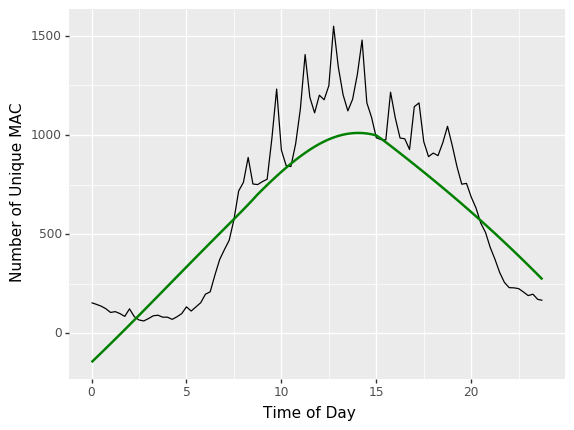

<ggplot: (-9223371893283044727)>

In [767]:
(
    ggplot(final_building_counts.groupby("hour")["n_unq_mac"].sum().reset_index() , aes(x="hour" , y="n_unq_mac" ))
    + geom_line(  group=1)
    + geom_smooth(color="green")
    + xlab("Time of Day")
    + ylab("Number of Unique MAC")
    
)

In [768]:
final_building_counts["building"] = final_building_counts["building"].astype("category").cat.reorder_categories(final_building_counts.groupby(["building"])["n_unq_mac"].max().sort_values(ascending=False).index.values)

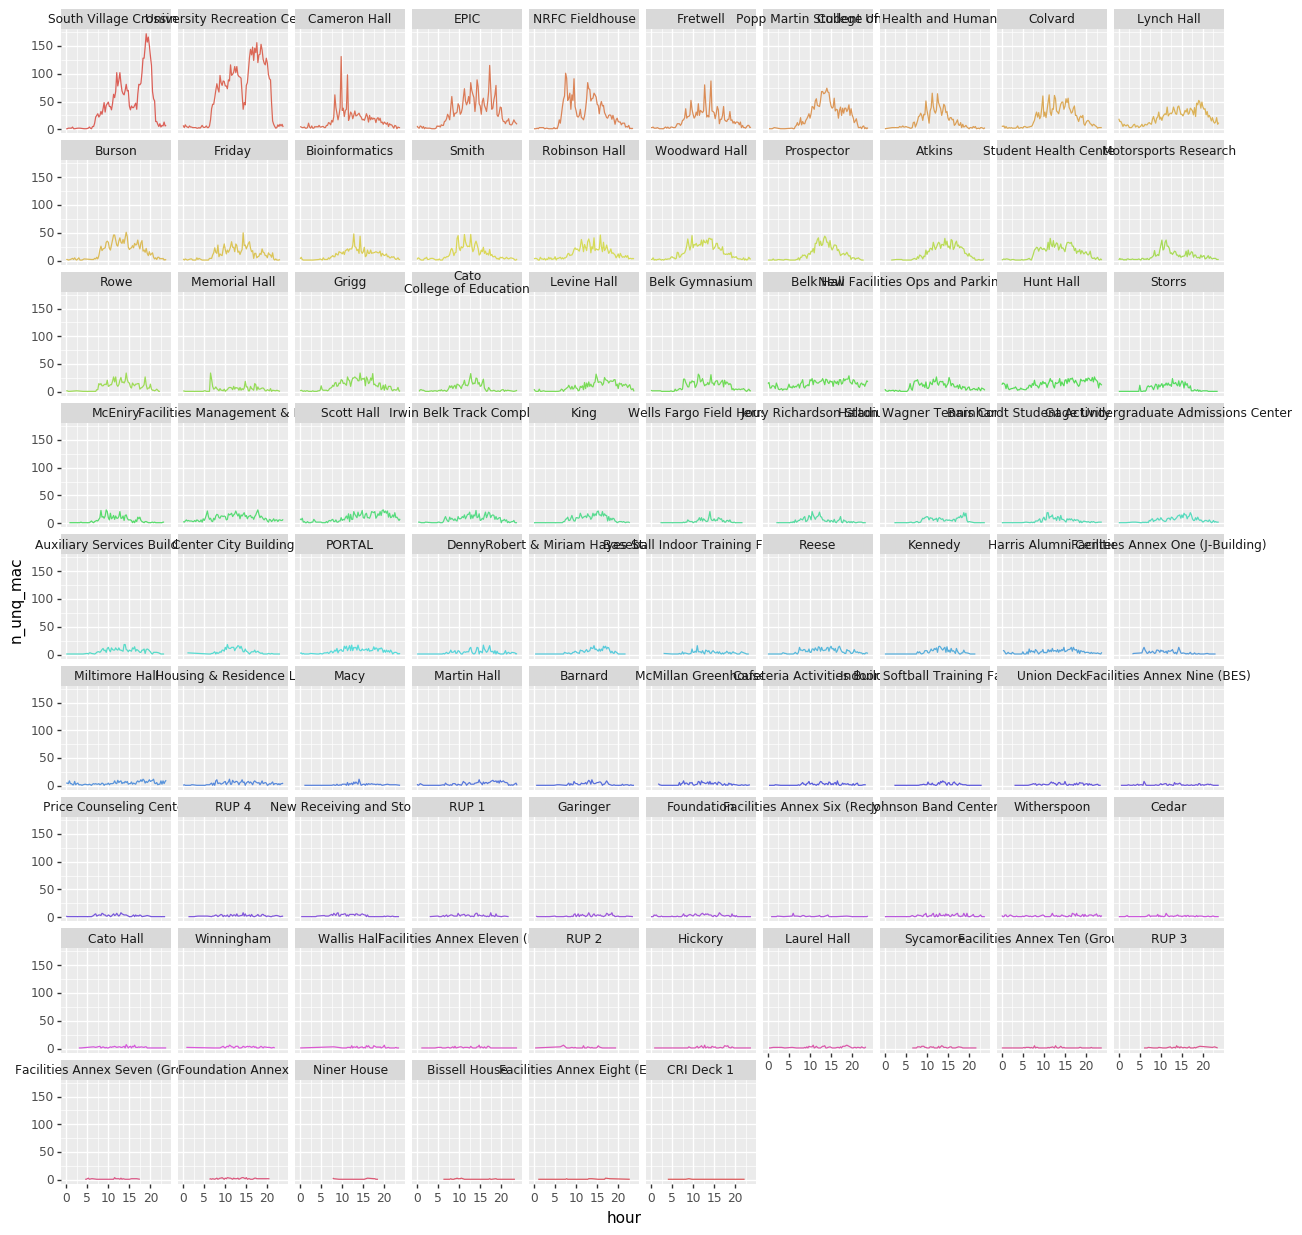

<ggplot: (-9223371893297401235)>

In [769]:
(
    ggplot(final_building_counts)
    + geom_line(aes(x="hour" , y="n_unq_mac" , color="building"))
    + facet_wrap("~ building")
    + scale_color_discrete(guide=False)
    + theme(figure_size=(15,15))
)

In [739]:
time_spent_per_building = user_time_series.groupby(["mac", "building"])["time"].nunique()*15
time_spent_per_building = time_spent_per_building.reset_index()

In [749]:
time_spent_per_building = time_spent_per_building.groupby("building")["time"].mean().sort_values(ascending=False).reset_index()
time_spent_per_building["building"] = time_spent_per_building["building"].astype("category").cat.reorder_categories(time_spent_per_building["building"])

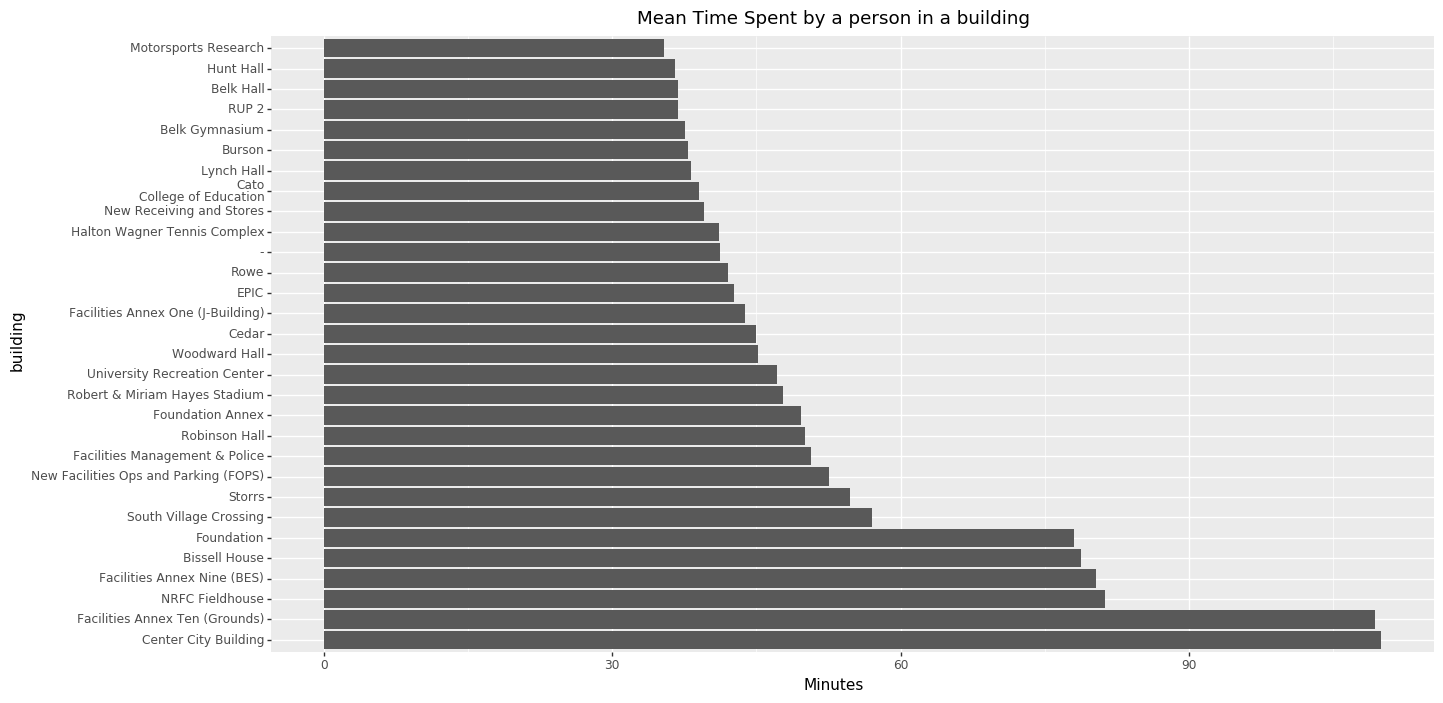

<ggplot: (143577589582)>

In [772]:
(

    ggplot(time_spent_per_building.groupby("building")["time"].mean().sort_values(ascending=False).reset_index().head(30))
    + geom_col(aes(x="building" , y="time"))
    + coord_flip()
    + theme(figure_size=(15,8))
    + ggtitle("Mean Time Spent by a person in a building")
    + ylab("Minutes")
)

C:\Users\Abhijeet\Documents\GitHub\Datathon\dt\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 100'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


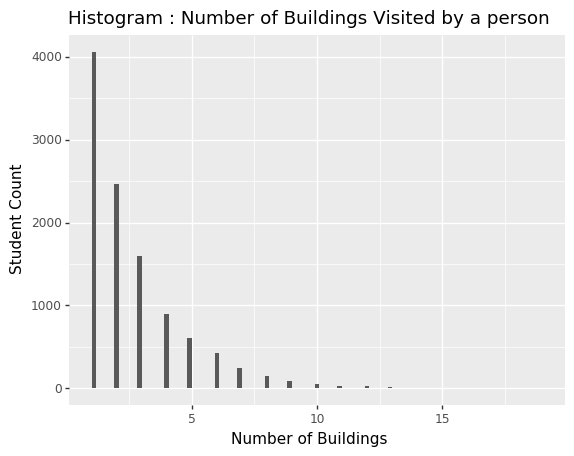

<ggplot: (-9223371893247861311)>

In [771]:
(
    ggplot(user_time_series.groupby("mac")["building"].nunique().reset_index())
    + geom_histogram(aes(x="building"))
    + ggtitle("Histogram : Number of Buildings Visited by a person")
    + xlab("Number of Buildings")
    + ylab("Student Count")
)